##House Prices Prediction
###Analysis


#####Importing Libraries

In [26]:
# Importing Libraries 

import pandas as pd
import numpy as np

In [14]:
# reading training files 

df=pd.read_csv('train.csv')

In [16]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [25]:
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'Pav

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [43]:
print("Some statistics of Sale price\n")
print(df['SalePrice'].describe())
print "\nThe median of the Housing Price is: ", df['SalePrice'].median(axis = 0)


Some statistics of Sale price

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The median of the Housing Price is:  163000.0


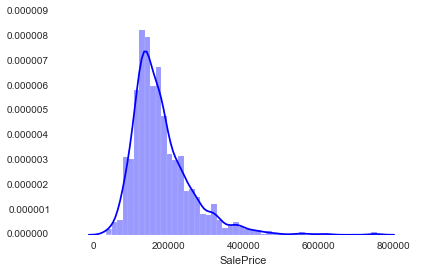

In [61]:
sns.distplot(df['SalePrice'], color='blue',hist_kws={'alpha': 0.4})

## Numerical Features

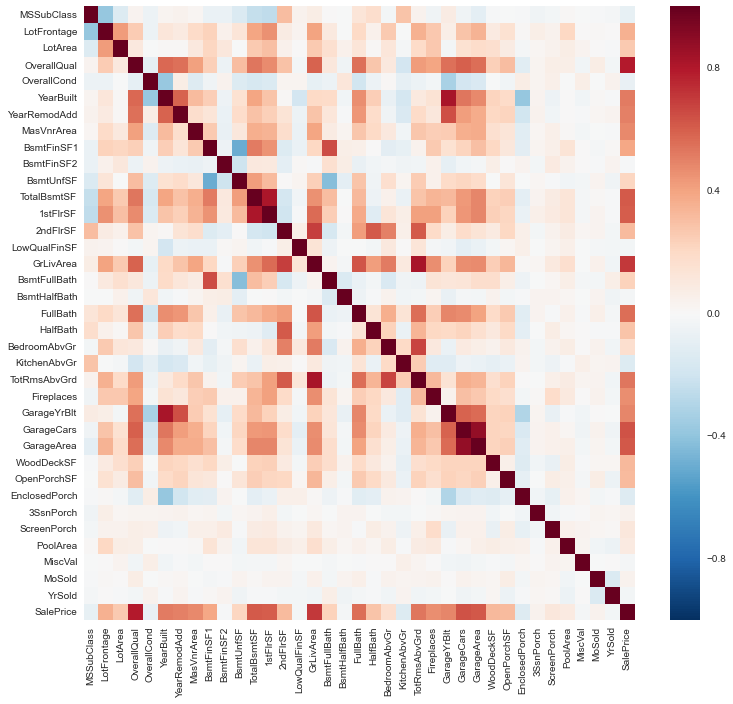

In [85]:
corr=df.select_dtypes(include=['float64','int64']).iloc[:, 1:].corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr, vmax=1)


In [97]:
cor_dict=corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print "List numerical features decendingly by their correlation with SalePrice"
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print ("{0} \t:{1}".format(*ele))

List numerical features decendingly by their correlation with SalePrice
OverallQual 	:0.790981600584
GrLivArea 	:0.708624477613
GarageCars 	:0.640409197258
GarageArea 	:0.623431438918
TotalBsmtSF 	:0.613580551559
1stFlrSF 	:0.605852184692
FullBath 	:0.560663762748
TotRmsAbvGrd 	:0.533723155582
YearBuilt 	:0.522897332879
YearRemodAdd 	:0.507100967111
GarageYrBlt 	:0.486361677488
MasVnrArea 	:0.477493047096
Fireplaces 	:0.466928836752
BsmtFinSF1 	:0.386419806242
LotFrontage 	:0.351799096571
WoodDeckSF 	:0.324413444568
2ndFlrSF 	:0.319333802832
OpenPorchSF 	:0.315856227116
HalfBath 	:0.284107675595
LotArea 	:0.263843353871
BsmtFullBath 	:0.227122233131
BsmtUnfSF 	:0.214479105547
BedroomAbvGr 	:0.168213154301
KitchenAbvGr 	:-0.135907370842
EnclosedPorch 	:-0.128577957926
ScreenPorch 	:0.111446571143
PoolArea 	:0.0924035494919
MSSubClass 	:-0.0842841351266
OverallCond 	:-0.0778558940487
MoSold 	:0.0464322452238
3SsnPorch 	:0.0445836653357
YrSold 	:-0.0289225851687
LowQualFinSF 	:-0.02560613